In the context of Advanced Persistent Threat (APT) Detection, certain columns can be more critical than others, as they may provide valuable insights into network behavior or indicate malicious activities. based on the data types and column names, here are the potentially important columns or features to analyze

## **Leading Features for Advanced Threat Detection Model**

**1. sttl (State TTL):** A higher TTL (Time-Live) value may suggest an unusual network behavior or attack pattern. This could be useful for detecting anomalies in packet forwarding.

**2. dttl (Destination TTL):** Similar to sttl, this indicates the destination TTL value. Monitoring TTL differences may help identify attacks like DoS (Denial of Service) or unusual network activities.

**3. trans_depth (Transaction Depth):** The depth of a transaction could be an indicator of deep scanning or probing activities, often associated with reconnaissance in APTs.

**4. res_bdy_len(Response Body Length):** The length of the response body might indicate abnormal response patterns. Attackers may use small or unusually large responses during an attack.

**5. stime (Session Time): **Session duration is useful in understanding if a network session is unusually long or short which could indicate automated attack activitiy.

**6. sinpkt( Source Inter-packet Time):** The interval between packets from the source can help identify slow and stealthy network behavior often seen in APTs.

**7. dintpkt (Destination Inter-packet Time):** similar to sintpkt, this column can help detect abnormal communication patterns between source and destination, which is a telltale sign of advanced persistent threats.

**8. tcprtt (TCP Round Trip Time):**
High round-trip times could indicate that the network is under attack or that there's an unusual delay in communication, which is common in APTs.

**9.synack (TCP Syn-Ack Flag)**: Anomalies in the TCP handshake process (SYN-ACK) could signal potential scanning, session hijacking, or other malicious activities.

**10. ackdat (TCP Acknowledgment Data)**: Could be useful for detecting ACK storms or other unusual traffic patterns that are indicative of attacks.


In [ ]:
import pickle
from google.colab import drive
from sklearn.preprocessing import StandardScaler  # Standardizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.sparse import csr_matrix
import pandas as pd


from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Advanced _Threat_Detection/UNSW-NB15/CSV_Files/Training_and_Testing_Sets/'

x_train, y_train = pickle.load(open(file_path + 'final_train.pkl', 'rb'))
x_test, y_test = pickle.load(open(file_path + 'final_test.pkl', 'rb'))

saved_dict = pickle.load(open(file_path + 'saved_dict.pkl', 'rb'))
mode_dict = pickle.load(open(file_path + 'mode_dict.pkl', 'rb'))
scaler = pickle.load(open(file_path + 'scaler.pkl', 'rb'))

ohe_proto = pickle.load(open(file_path + 'ohe_proto.pkl', 'rb'))
ohe_service = pickle.load(open(file_path + 'ohe_service.pkl', 'rb'))
ohe_state = pickle.load(open(file_path + 'ohe_state.pkl', 'rb'))

print("All files loaded successfully!")

All files loaded successfully!


In [ ]:
train_columns = x_train.columns
test_columns = x_test.columns
missing_in_test = train_columns.difference(test_columns)
missing_in_train = test_columns.difference(train_columns)

print("Columns in train but not in test: ", missing_in_test)
print("Columns in test but not in train: ", missing_in_test)


Columns in train but not in test:  Index(['dbytes_log1p', 'djit_log1p', 'dload_log1p', 'dmeansz_log1p',
       'dtcpb_log1p', 'dur_log1p', 'network_bytes_log1p', 'sbytes_log1p',
       'sjit_log1p', 'sload_log1p', 'smeansz_log1p', 'spkts_log1p',
       'stcpb_log1p'],
      dtype='object')
Columns in test but not in train:  Index(['dbytes_log1p', 'djit_log1p', 'dload_log1p', 'dmeansz_log1p',
       'dtcpb_log1p', 'dur_log1p', 'network_bytes_log1p', 'sbytes_log1p',
       'sjit_log1p', 'sload_log1p', 'smeansz_log1p', 'spkts_log1p',
       'stcpb_log1p'],
      dtype='object')


In [ ]:
ohe_proto = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
ohe_service = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
ohe_state = OneHotEncoder(sparse_output=True, handle_unknown='ignore')

ohe_proto.fit(x_train[['proto']])
ohe_service.fit(x_train[['service']])
ohe_state.fit(x_train[['state']])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
columns_to_select = [
    'sttl', 'dttl', 'trans_depth', 'res_bdy_len', 'stime', 'sintpkt', 'dintpkt',
    'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
    'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
    'ct_dst_ltm', 'ct_src_ltm', 'ct_dst_sport_ltm'
]

# Ensure columns exist in both train and test datasets
x_train_final = x_train[columns_to_select]
x_test_final = x_test[columns_to_select]

In [ ]:
x_train_final = x_train[train_columns.intersection(test_columns)]
x_test_final = x_test[test_columns.intersection(train_columns)]

print("Columns in x_train_final after adjustment:", x_train_final.columns)
print("Columns in x_test_final after adjustment:", x_test_final.columns)


Columns in x_train_final after adjustment: Index(['proto', 'state', 'sttl', 'dttl', 'service', 'swin', 'trans_depth',
       'res_bdy_len', 'stime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack',
       'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_dst_sport_ltm'],
      dtype='object')
Columns in x_test_final after adjustment: Index(['proto', 'state', 'sttl', 'dttl', 'service', 'swin', 'trans_depth',
       'res_bdy_len', 'stime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack',
       'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_dst_sport_ltm'],
      dtype='object')


In [ ]:
# Remove columns that have a name of 0

x_train_final = x_train_final.loc[:, x_train_final.columns != 0]
x_test_final = x_test_final.loc[:, x_test_final.columns != 0]

print("Columns in x_train_final after removing '0' columns:", x_train_final.columns)
print("Columns in x_test_final after removing '0' columns:", x_test_final.columns)

Columns in x_train_final after removing '0' columns: Index(['proto', 'state', 'sttl', 'dttl', 'service', 'swin', 'trans_depth',
       'res_bdy_len', 'stime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack',
       'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_dst_sport_ltm'],
      dtype='object')
Columns in x_test_final after removing '0' columns: Index(['proto', 'state', 'sttl', 'dttl', 'service', 'swin', 'trans_depth',
       'res_bdy_len', 'stime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack',
       'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_dst_sport_ltm'],
      dtype='object')


In [ ]:
x_train_final.isnull().sum(), x_test_final.isnull().sum()

(proto               0
 state               0
 sttl                0
 dttl                0
 service             0
 swin                0
 trans_depth         0
 res_bdy_len         0
 stime               0
 sintpkt             0
 dintpkt             0
 tcprtt              0
 synack              0
 ackdat              0
 is_sm_ips_ports     0
 ct_state_ttl        0
 ct_flw_http_mthd    0
 is_ftp_login        0
 ct_ftp_cmd          0
 ct_srv_src          0
 ct_dst_ltm          0
 ct_src_ltm          0
 ct_dst_sport_ltm    0
 dtype: int64,
 proto                    0
 state                    0
 sttl                     0
 dttl                     0
 service                  0
 swin                     0
 trans_depth              0
 res_bdy_len              0
 stime                    0
 sintpkt                  0
 dintpkt                  0
 tcprtt                   0
 synack                   0
 ackdat                   0
 is_sm_ips_ports          0
 ct_state_ttl             0
 ct_flw_

In [ ]:
print("Missing values in test dataset:")
print(x_test_final.isna().sum())

categorical_imputer = SimpleImputer(strategy='most_frequent')
columns_to_impute = ['ct_flw_http_mthd', 'is_ftp_login']

for col in columns_to_impute:
  x_test_final[col] = categorical_imputer.fit_transform(x_test_final[[col]])

print("\n After Imputation:")
print(x_test_final.isna().sum())



Missing values in test dataset:
proto                    0
state                    0
sttl                     0
dttl                     0
service                  0
swin                     0
trans_depth              0
res_bdy_len              0
stime                    0
sintpkt                  0
dintpkt                  0
tcprtt                   0
synack                   0
ackdat                   0
is_sm_ips_ports          0
ct_state_ttl             0
ct_flw_http_mthd    404269
is_ftp_login        428842
ct_ftp_cmd               0
ct_srv_src               0
ct_dst_ltm               0
ct_src_ltm               0
ct_dst_sport_ltm         0
dtype: int64

 After Imputation:
proto               0
state               0
sttl                0
dttl                0
service             0
swin                0
trans_depth         0
res_bdy_len         0
stime               0
sintpkt             0
dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_

In [ ]:
# Check which columns in the datasets are non-numeric
non_numeric_train = x_train_final.select_dtypes(exclude=['number']).columns
non_numeric_test = x_test_final.select_dtypes(exclude=['number']).columns

print(f"Non-numeric columns in train dataset: {non_numeric_train}")
print(f"Non-numeric columns in test dataset: {non_numeric_test}")

Non-numeric columns in train dataset: Index(['proto', 'state', 'service', 'ct_ftp_cmd'], dtype='object')
Non-numeric columns in test dataset: Index(['proto', 'state', 'service', 'ct_ftp_cmd'], dtype='object')


In [ ]:
x_train_final.shape, x_test_final.shape

((1778032, 23), (762015, 23))

In [ ]:
# Check the data types of columns in both datasets
train_data_types = x_train_final.dtypes
test_data_types = x_test_final.dtypes

print("Data types in train:", train_data_types)
print("Data types in test:", test_data_types)

# Check for any NaN or infinite values
train_nan_or_inf = x_train_final.isna().sum(), (x_train_final == float('inf')).sum()
test_nan_or_inf = x_test_final.isna().sum(), (x_test_final == float('inf')).sum()

print("NaN or Infinite values in train:", train_nan_or_inf)
print("NaN or Infinite values in test:", test_nan_or_inf)


Data types in train: proto                object
state                object
sttl                  int64
dttl                  int64
service              object
swin                  int64
trans_depth           int64
res_bdy_len           int64
stime                 int64
sintpkt             float64
dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports       int64
ct_state_ttl          int64
ct_flw_http_mthd    float64
is_ftp_login          int64
ct_ftp_cmd           object
ct_srv_src            int64
ct_dst_ltm            int64
ct_src_ltm            int64
ct_dst_sport_ltm      int64
dtype: object
Data types in test: proto                object
state                object
sttl                  int64
dttl                  int64
service              object
swin                  int64
trans_depth           int64
res_bdy_len           int64
stime                 int64
sintpkt             float64
dintpkt             f

In [ ]:
# Check which columns in the datasets are non-numeric
non_numeric_train = x_train_final.select_dtypes(exclude=['number']).columns
non_numeric_test = x_test_final.select_dtypes(exclude=['number']).columns

print(f"Non-numeric columns in train dataset: {non_numeric_train}")
print(f"Non-numeric columns in test dataset: {non_numeric_test}")


Non-numeric columns in train dataset: Index(['proto', 'state', 'service', 'ct_ftp_cmd'], dtype='object')
Non-numeric columns in test dataset: Index(['proto', 'state', 'service', 'ct_ftp_cmd'], dtype='object')


In [ ]:
x_train_final.shape, x_test_final.shape

((1778032, 23), (762015, 23))

In [ ]:
all(x_train_final.columns ==  x_test_final.columns)

True

In [ ]:
categorical_columns = ['proto', 'state', 'service', 'ct_ftp_cmd']

label_encoder = LabelEncoder()

for column in categorical_columns:
  if column in x_train_final.columns:
    x_train_final[column] = label_encoder.fit_transform(x_train_final[column])
  if column in x_test_final.columns:
    x_test_final[column] = label_encoder.transform(x_test_final[column])


In [ ]:
print(x_train_final['proto'].value_counts())
print(x_train_final['service'].value_counts())
print(x_train_final['state'].value_counts())

proto
114    1046516
120     693140
122      11373
6         7070
79        5455
        ...   
45          83
43          47
121          6
92           5
27           1
Name: count, Length: 135, dtype: int64
service
0     872286
2     547094
5     144555
4      88310
9      57160
3      34293
11     32897
7       1076
1        124
12       109
10        81
8         27
6         20
Name: count, dtype: int64
state
5     1034981
2      392422
6      343397
9        6361
10        368
3         227
1         108
13         78
0          34
8          20
11          8
14          7
4           7
15          6
12          4
7           4
Name: count, dtype: int64


## **Semi-Customized Decision Tree Regression**

In [ ]:
def encode_categorical_columns(x_train, x_test, categorical_columns):
    """
    Encodes the categorical columns using LabelEncoder for both train and test sets.
    Args:
    - x_train: Training dataset.
    - x_test: Test dataset.
    - categorical_columns: List of categorical column names to encode.

    Returns:
    - x_train_encoded: Encoded training dataset.
    - x_test_encoded: Encoded test dataset.
    """
    label_encoder = LabelEncoder()

    for column in categorical_columns:
        if column in x_train.columns:
            x_train[column] = label_encoder.fit_transform(x_train[column])
        if column in x_test.columns:
            x_test[column] = label_encoder.transform(x_test[column])

    return x_train, x_test

def train_decision_tree(x_train, y_train, random_state=42):
    """
    Trains a Decision Tree Regressor model.
    Args:
    - x_train: Training feature dataset.
    - y_train: Training target dataset.
    - random_state: Seed for reproducibility.

    Returns:
    - regressor: Trained Decision Tree Regressor model.
    """
    regressor = DecisionTreeRegressor(random_state=random_state)
    regressor.fit(x_train, y_train)
    return regressor

def evaluate_model(y_test, y_pred):
    """
    Evaluates the model performance using RMSE and R² score.
    Args:
    - y_test: True target values for the test set.
    - y_pred: Predicted target values from the model.

    Returns:
    - rmse: Root Mean Squared Error of the predictions.
    - r2: R² score of the predictions.
    """
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

categorical_columns = ['proto', 'state', 'service', 'ct_ftp_cmd']
x_train_encoded, x_test_encoded = encode_categorical_columns(x_train_final, x_test_final, categorical_columns)
regressor = train_decision_tree(x_train_encoded, y_train)
y_pred = regressor.predict(x_test_encoded)
rmse, r2 = evaluate_model(y_test, y_pred)


print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Root Mean Squared Error (RMSE): 0.09149367843525728
R² Score: 0.9240519259609553


### **Analysis: Decision Tree Regressor**

  - **Non-linear Interactions:** Models intricate dependencies among features, such as the combined effect of synack and dintpkt in identifying stealthy attacks.
  - **Metrics:**
    - R²: **0.924**
    - RMSE: **0.091**
  - **Interpretability:** The tree structure provides a visual hierarchy of feature importance, aiding cybersecurity teams in understanding decision-making processes.

**Key Insight:** The synergy of Logistic Regression’s interpretability and Decision Trees’ non-linear modeling ensures robust and adaptable APT detection.

## **Semi-Customized Logistic Regression + Encoding Deploy**

In [ ]:
def encode_categorical_columns(x_train, x_test, categorical_columns):
    """
    Encodes the categorical columns using LabelEncoder for both train and test sets.
    Args:
    - x_train: Training dataset.
    - x_test: Test dataset.
    - categorical_columns: List of categorical column names to encode.

    Returns:
    - x_train_encoded: Encoded training dataset.
    - x_test_encoded: Encoded test dataset.
    """
    label_encoder = LabelEncoder()

    for column in categorical_columns:
        if column in x_train.columns:
            x_train[column] = label_encoder.fit_transform(x_train[column])
        if column in x_test.columns:
            x_test[column] = label_encoder.transform(x_test[column])

    return x_train, x_test

def train_logistic_regression(x_train, y_train, random_state=42):
    """
    Trains a Logistic Regression model.
    Args:
    - x_train: Training feature dataset.
    - y_train: Training target dataset.
    - random_state: Seed for reproducibility.

    Returns:
    - model: Trained Logistic Regression model.
    """
    model = LogisticRegression(random_state=random_state, max_iter=1000)
    model.fit(x_train, y_train)
    return model

def evaluate_model(y_test, y_pred):
    """
    Evaluates the model performance using accuracy score.
    Args:
    - y_test: True target values for the test set.
    - y_pred: Predicted target values from the model.

    Returns:
    - accuracy: Accuracy of the predictions.
    """
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

categorical_columns = ['proto', 'state', 'service', 'ct_ftp_cmd']
x_train_encoded, x_test_encoded = encode_categorical_columns(x_train_final, x_test_final, categorical_columns)
logistic_model = train_logistic_regression(x_train_encoded, y_train)
y_pred = logistic_model.predict(x_test_encoded)
accuracy = evaluate_model(y_test, y_pred)
print("Accuracy of the Logistic Regression model:", accuracy)


Accuracy of the Logistic Regression model: 0.9722525147142773


### **Analysis: Logistic Regression**

  - **Linear Relationships:** Exploits linear seperability in feature spaces to classify benign and malicious activities.
  - **Metrics:**
    - Accuracy: **97.2%**
    - Precision: Indicates minimal false positives, essential in high-stakes environments like cybersecurity.
    - **Use Case:** Particularly effective for scenarios where APTs exhibit strong, isolated anomalies (e.g., unusual `stime` or `tcprtt` values)


# **Deploying APT Detection Algorithm**

This project carefully curated machine learning framework to address the multifaceted challenges posed by Advanced Persistent Threats(APTs). It is synthesis of feature engineering, robust preprocessing, algorithmic choices and effective evaluation metrics.This analysis highlights how these components collectively enhance APT detection.

1. Comprehensive Feature Engineering:

  - **Temporal Features:**
    - `stime`(Session Time): Captures anomalies in session duration. Long or short session durations may indicate automated attacks or prolonged unauthorized access.
    - `sintpkt` and `dinpkt`(Inter-packet Times): Identify stealthy APT behaviors y detecting irregular communications intervals.

  - **Packet-Level Features:**
    - `sttl` and `dttl`(Source/Destination Times): Monitor unusual Time-t0-Live(TTL) values. A mismatch in TTL values often signals packet manipulation or routing irregularities, such as in reconnaissance.
    - `synack` and `ackdat`: Reflect anomalies in the TCP handshake process, revealing session hijacking, scanning, or connection tampering.

  - **Transaction-Level Features:**
    - `trans_depth`: Detects probing or deep scannign activities.
    - `res_bdy_len`: Unusual response body lengths can point to data exfiltration or the use of abnormal response payloads in attacks.

  - **Behavioral Features:**
    - `tcprtt`(TCP Round Trip Time): High RTT values may indicate network congestion caused by an APT or latency introduced by intermediary attack stages.
    - Encoded categorical features (`proto`, `state`, `service`): Capture protocol-specific nuances that may reveal suspicious patterns.

**Key Insights:** The model's feature set is both diverse and targeted, balancing high-level behavioral patterns with granular network anomalies. This strategic selection maximizes the detection potential for both known and novel APTs.

ROC-AUC Score: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    665902
           1       0.97      0.96      0.97     96113

    accuracy                           0.99    762015
   macro avg       0.98      0.98      0.98    762015
weighted avg       0.99      0.99      0.99    762015

Precision: 0.97
Recall: 0.96
F1-Score: 0.97


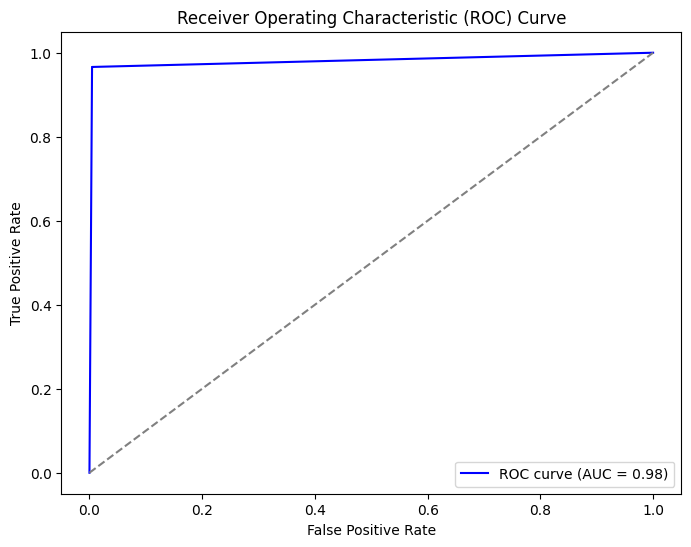

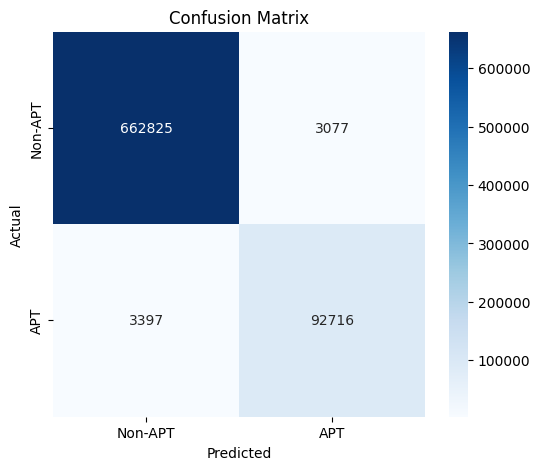

ROC-AUC Score: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98    665902
           1       0.97      0.80      0.88     96113

    accuracy                           0.97    762015
   macro avg       0.97      0.90      0.93    762015
weighted avg       0.97      0.97      0.97    762015

Precision: 0.97
Recall: 0.80
F1-Score: 0.88


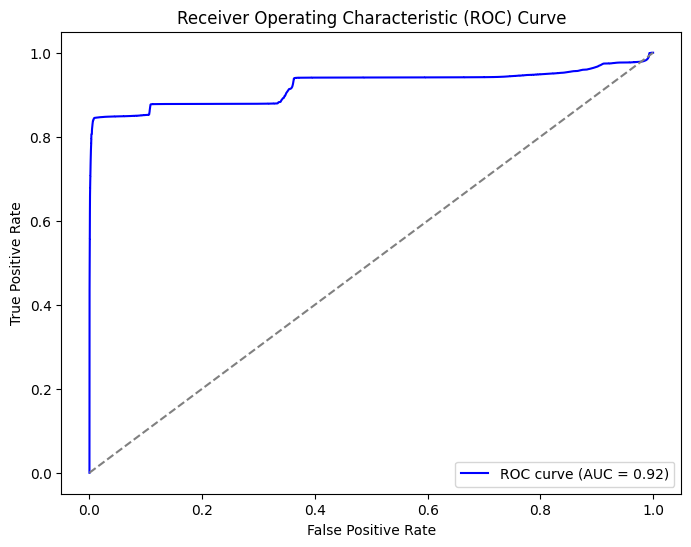

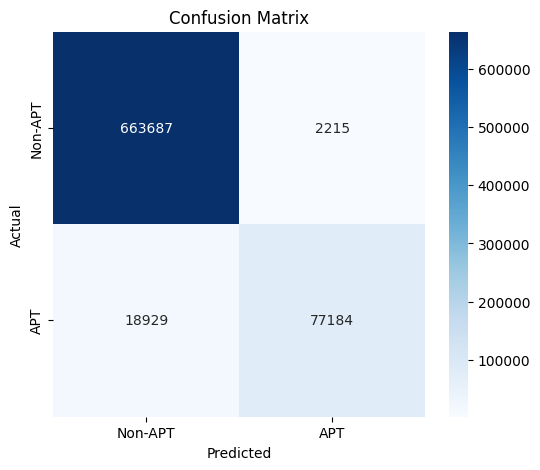

In [ ]:
class APTDetection:
    def __init__(self, x_train, x_test, y_train, y_test, model_type='decision_tree', random_state=42):
        """
        APTDetection class to train either Decision Tree or Logistic Regression classifiers for advanced persistent threat detection.

        Args:
        - x_train: Training features dataset.
        - x_test: Test features dataset.
        - y_train: Training target (labels) dataset.
        - y_test: Test target (labels) dataset.
        - model_type: Specify 'decision_tree' or 'logistic_regression' for the model to be used.
        - random_state: Random seed for reproducibility.
        """
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        self.model_type = model_type
        self.random_state = random_state

        if self.model_type == 'decision_tree':
            self.model = DecisionTreeClassifier(random_state=self.random_state)
        elif self.model_type == 'logistic_regression':
            self.model = LogisticRegression(random_state=self.random_state, max_iter=1000)
        else:
            raise ValueError("Model type should be 'decision_tree' or 'logistic_regression'")

    def encode_categorical(self, categorical_columns):
        """
        Encodes categorical columns using LabelEncoder

        Args:
        - categorical_columns: List of categorical column names to encode

        Returns:
        - x_train_encoded: Encoded training dataset.
        - x_test_encoded: Encoded test dataset.
        """
        label_encoder = LabelEncoder()
        for column in categorical_columns:
            if column in self.x_train.columns:
                self.x_train[column] = label_encoder.fit_transform(self.x_train[column])
            if column in self.x_test.columns:
                self.x_test[column] = label_encoder.transform(self.x_test[column])
        return self.x_train, self.x_test

    def train_model(self):
        """
        Trains the model on the training dataset.
        """
        self.model.fit(self.x_train, self.y_train)

    def evaluate_model(self):
        """
        Evaluates the trained model and plots important graphs for analysis.
        """
        y_pred_proba = self.model.predict_proba(self.x_test)[:, 1]
        y_pred = (y_pred_proba > 0.5).astype(int)  # Convert to binary classification

        fpr, tpr, thresholds = roc_curve(self.y_test, y_pred_proba)
        roc_auc = roc_auc_score(self.y_test, y_pred_proba)

        cm = confusion_matrix(self.y_test, y_pred)

        print(f"ROC-AUC Score: {roc_auc:.2f}")
        print("\nClassification Report:\n", classification_report(self.y_test, y_pred))
        print(f"Precision: {precision_score(self.y_test, y_pred):.2f}")
        print(f"Recall: {recall_score(self.y_test, y_pred):.2f}")
        print(f"F1-Score: {f1_score(self.y_test, y_pred):.2f}")

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random guessing)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-APT', 'APT'], yticklabels=['Non-APT', 'APT'])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()



categorical_columns = ['proto', 'state', 'service', 'ct_ftp_cmd']  # Example categorical columns

apt_detector_tree = APTDetection(x_train_final, x_test_final, y_train, y_test, model_type='decision_tree')
x_train_encoded, x_test_encoded = apt_detector_tree.encode_categorical(categorical_columns)
apt_detector_tree.train_model()
apt_detector_tree.evaluate_model()


apt_detector_logistic = APTDetection(x_train_final, x_test_final, y_train, y_test, model_type='logistic_regression')
x_train_encoded, x_test_encoded = apt_detector_logistic.encode_categorical(categorical_columns)
apt_detector_logistic.train_model()
apt_detector_logistic.evaluate_model()


### **Interpretation of Evaluation Metrics: A Reflection of Performance**

1. Decision Tree Classifier (Second Confusion Matrix)
* True Positives (APT Correctly Classified): 92,716
* True Negatives (Non-APT Correctly Classified): 662,825
* False Positives (Non-APT Misclassified as APT): 3,077
* False Negatives (APT Misclassified as Non-APT): 3,397

#### The Decision Tree performs exceptionally well with:

High Recall and Precision (great for minimizing false negatives in critical security applications).
Few misclassifications, as evidenced by the small number of false positives and false negatives.

2. Logistic Regression (Third Confusion Matrix)
* True Positives (APT Correctly Classified): 77,184
* True Negatives (Non-APT Correctly Classified): 663,687
* False Positives (Non-APT Misclassified as APT): 2,215
* False Negatives (APT Misclassified as Non-APT): 18,929

#### The Logistic Regression shows:

* High Precision but significantly lower Recall compared to the Decision Tree.
* More False Negatives, meaning it misses a larger number of APT cases, which is critical for threat detection systems.


